In [1]:
import pandas as pd
import numpy as np

In [2]:
saheart_ds = pd.read_csv( "../data/SAheart.data" )

In [3]:
saheart_ds.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline



chd_df = pd.DataFrame( saheart_ds.chd.value_counts() )

chd_df

,chd
0,302
1,160


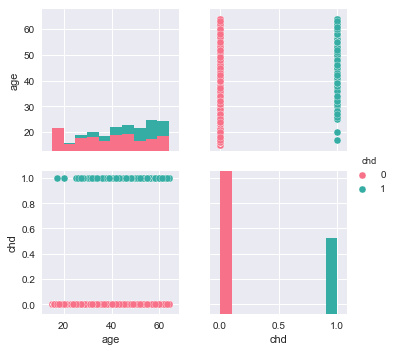

In [5]:
saheart_ds_sub = saheart_ds[[ 'age', 'chd']]
sn.pairplot( saheart_ds_sub
         , hue = "chd"
         , palette="husl")

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
logreg = LogisticRegression()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:

saheart_model_df = pd.get_dummies(saheart_ds, drop_first = True)


In [8]:
feature_cols = ['age']

saheart_train_X, saheart_test_X,  \
saheart_train_Y, saheart_test_Y = train_test_split( saheart_model_df[feature_cols],
                                                  saheart_model_df['chd'],
                                                  test_size = 0.1,
                                                  random_state = 42 )

logreg.fit( saheart_train_X, saheart_train_Y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
list( zip( feature_cols, logreg.coef_[0] ) )

[('age', 0.054954789203174981)]

In [10]:
logreg.intercept_

array([-3.05632794])

In [11]:
feature_cols = ['sbp', 'tobacco', 'ldl',
              'adiposity', 'typea',
              'obesity', 'alcohol',
              'age', 'famhist_Present' ]

#saheart_train_Y, saheart_test_X,  \
#saheart_train_Y, saheart_test_Y = train_test_split( saheart_model_df[feature_cols],
 #                                                saheart_model_df['chd'],
  #                                               test_size = 0.3,
   #                                             random_state = 42 )

In [12]:
len( saheart_train_X )

415

In [13]:
len( saheart_test_X )

47

In [14]:
#logreg.fit( saheart_train_X, saheart_train_Y )

In [15]:
list( zip( feature_cols, logreg.coef_[0] ) )

[('sbp', 0.054954789203174981)]

In [16]:
logreg.intercept_

array([-3.05632794])

In [17]:
saheart_test_results = pd.DataFrame( { 'actual':  saheart_test_Y,
                                   'predicted': logreg.predict( saheart_test_X ) } )
saheart_test_results.head()

,actual,predicted
225,0,0
30,1,0
39,1,1
222,0,1
124,0,0


In [18]:
saheart_test_results = saheart_test_results.reset_index()
saheart_test_results.head()

,index,actual,predicted
0,225,0,0
1,30,1,0
2,39,1,1
3,222,0,1
4,124,0,0


In [19]:



from sklearn import metrics

cm = metrics.confusion_matrix( saheart_test_results.actual,
                            saheart_test_results.predicted, [1,0] )
cm

array([[ 3, 14],
       [ 5, 25]])

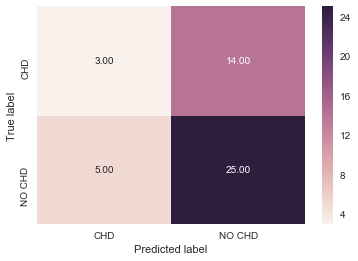

In [20]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [21]:


predict_proba_df = pd.DataFrame( logreg.predict_proba( saheart_test_X ) )
predict_proba_df.head()



,0,1
0,0.678792,0.321208
1,0.641841,0.358159
2,0.467284,0.532716
3,0.440050,0.559950
4,0.641841,0.358159


In [22]:
saheart_test_X.head()

,age
225,42
30,45
39,58
222,60
124,45


In [23]:
saheart_test_results['chd_0'] = predict_proba_df.iloc[:,0:1]
saheart_test_results['chd_1'] = predict_proba_df.iloc[:,1:2]

In [24]:
saheart_test_results['new_labels'] = saheart_test_results['chd_1'].map( lambda x: 1 if x >= 0.34 else 0 )

In [25]:
saheart_test_results.head(10)

,index,actual,predicted,chd_0,chd_1,new_labels
0,225,0,0,0.678792,0.321208,0
1,30,1,0,0.641841,0.358159,1
2,39,1,1,0.467284,0.532716,1
3,222,0,1,0.440050,0.559950,1
4,124,0,0,0.641841,0.358159,1
5,203,0,1,0.386801,0.613199,1
6,401,0,0,0.589898,0.410102,1
7,211,1,0,0.702271,0.297729,0
8,456,0,1,0.480985,0.519015,1
9,77,1,0,0.508453,0.491547,1


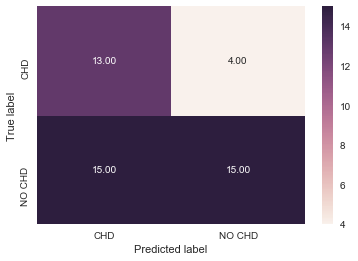

In [26]:
cm = metrics.confusion_matrix( saheart_test_results.actual,
                            saheart_test_results.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [27]:
round( float( metrics.accuracy_score( saheart_test_results.actual,
                      saheart_test_results.new_labels) ), 2 )

0.6

# Decision Tree Classification

In [28]:
from sklearn import metrics

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

In [30]:
depths_list = [2,3,4,5,6]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit( saheart_train_X, saheart_train_Y )
    print( "Tree Depth: ",
          depth,
          " - Accuracy: ",
          metrics.accuracy_score( saheart_test_Y, clf_tree.predict( saheart_test_X ) ) )

Tree Depth:  2  - Accuracy:  0.617021276596
Tree Depth:  3  - Accuracy:  0.659574468085
Tree Depth:  4  - Accuracy:  0.68085106383
Tree Depth:  5  - Accuracy:  0.659574468085
Tree Depth:  6  - Accuracy:  0.617021276596


In [31]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )

In [32]:
clf_tree.fit( saheart_train_X, saheart_train_Y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
tree_predict = clf_tree.predict( saheart_test_X )

In [34]:
metrics.accuracy_score( saheart_test_Y, tree_predict )

0.68085106382978722

In [35]:
export_graphviz( clf_tree,
                out_file = "chd_tree.odt",
                feature_names = saheart_train_X.columns )

In [36]:
import pydotplus as pdot
import graphviz as gv
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )

In [37]:
chd_tree_graph.write_jpg( 'chd_tree.jpg' )

True

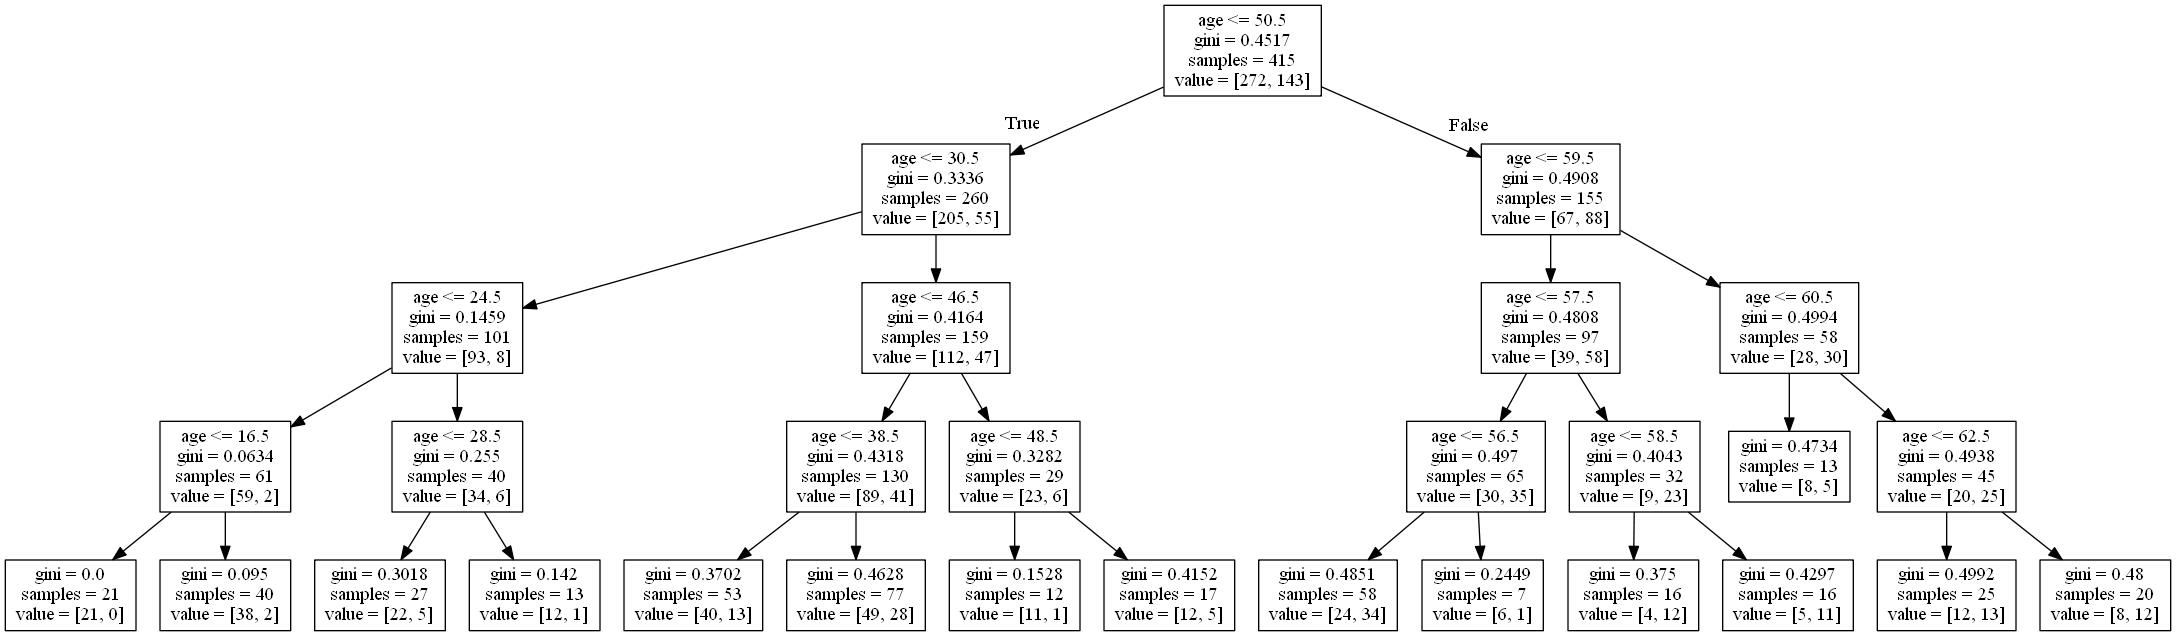

In [38]:

from IPython.display import Image
Image(filename='chd_tree.jpg')
